In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
run = pd.read_csv('ActivityList_MaryRobert.csv')
run.head()

,id,type,x_gear_name,day,month,year,x_start_h,name,x_min,x_km,...,start_longitude,timezone,total_photo_count,trainer,upload_id,upload_id_str,utc_offset,x_date,x_elev_%,x_url
0,975545643,Run,NaN,11,2,2017,10.7,Morning Run,74.3,11.448,...,-1.203424,(GMT+00:00) Europe/London,0,0,1.076616e+09,1.076616e+09,0,2/11/2017,0.62,https://www.strava.com/activities/975545643
1,975545595,Run,NaN,18,2,2017,10.3,Morning Run,82.8,12.755,...,-1.203288,(GMT+00:00) Europe/London,0,0,1.076616e+09,1.076616e+09,0,2/18/2017,0.68,https://www.strava.com/activities/975545595
2,975545491,Run,NaN,19,2,2017,9.7,Morning Run,42.7,7.242,...,-1.203178,(GMT+00:00) Europe/London,0,0,1.076616e+09,1.076616e+09,0,2/19/2017,0.88,https://www.strava.com/activities/975545491
3,975545407,Run,NaN,21,2,2017,6.0,Morning Run,37.1,6.446,...,-1.203521,(GMT+00:00) Europe/London,0,0,1.076616e+09,1.076616e+09,0,2/21/2017,0.95,https://www.strava.com/activities/975545407
4,975545534,Run,NaN,22,2,2017,6.0,Morning Run,33.7,5.935,...,-1.203256,(GMT+00:00) Europe/London,0,0,1.076616e+09,1.076616e+09,0,2/22/2017,0.72,https://www.strava.com/activities/975545534


In [39]:
run_clean = run[(run['type'] == 'Run')] 
run_clean.count()

id               616
type             616
x_gear_name        0
day              616
month            616
                ... 
upload_id_str    614
utc_offset       616
x_date           616
x_elev_%         607
x_url            616
Length: 75, dtype: int64

In [40]:
data = run_clean[["x_min/mi","type", "x_start_h", "x_min", "total_elevation_gain", "month"]]
data.head()

,x_min/mi,type,x_start_h,x_min,total_elevation_gain,month
0,10.45,Run,10.7,74.3,70.5,2
1,10.45,Run,10.3,82.8,87.1,2
2,9.48,Run,9.7,42.7,63.5,2
3,9.26,Run,6.0,37.1,61.3,2
4,9.15,Run,6.0,33.7,42.5,2


In [41]:
# Assign X (data) and y (target)

### BEGIN SOLUTION
X = data[['x_start_h', 'x_min', 'total_elevation_gain', 'month']]
y = data["x_min/mi"].values.reshape(-1, 1)
print(X.shape, y.shape)
### END SOLUTION

(616, 4) (616, 1)


In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [44]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

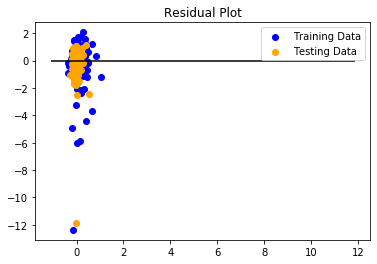

In [46]:
# Make predictions using a fitted model
# Plot the difference between the model predicted values and actual y values, versus the model predicted values
# Hint: You can predict values of X training and testing data using the model.predict() method on a fitted model

### BEGIN SOLUTION
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)

plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [47]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3804353293903102, R2: 0.011350497620925992


In [48]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3774877208486205, R2: 0.01346153582453169


In [49]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3804344643678808, R2: 0.011351117138534761


In [50]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 1.3784936260522875, R2: 0.012741119838449055
